In [73]:
import numpy as np
import gamma_spectra
from matplotlib import pyplot
import pyfits
import scipy.integrate as integrate

%matplotlib inline  

In [74]:
dE = 2.

D_0 = 100.                                              # pc^2 / kyr (for E in GeV)
delta = 0.4                                             # (for E in GeV)
c_light = 2.9979e8                                      # m / s speed of light
h_Planck = 4.1357e-15                                   # eV * s Planck constant
kB = 8.6173303e-5                                       # eV / K

In [75]:
height = 0
IRFmap_fn = '../../data/ISRF_flux/Standard_0_0_' + str(height) + '_Flux.fits.gz' # Model for the ISRF
hdu = pyfits.open(IRFmap_fn)                                                              # Physical unit of field: 'micron'
wavelengths = hdu[1].data.field('Wavelength') * 1.e-6                                     # in m
E_irf_galaxy = c_light * h_Planck / wavelengths[::-1]                                     # Convert wavelength in eV, invert order
EdNdE_irf_galaxy = hdu[1].data.field('Total')[::-1] / E_irf_galaxy                        # in 1/cm^3. Since unit of 'Total': eV/cm^3

dlogE_irf = 0.0230258509299398                                                            # Wavelength bin size
    
T_CMB = 2.73 * kB                                                                           # CMB temperature
E_irf = np.e**np.arange(np.log(E_irf_galaxy[len(E_irf_galaxy)-1]), -6.* np.log(10.), -dlogE_irf)[:0:-1]# CMB-energies array with same log bin size as IRF_galaxy in eV
irf_CMB = gamma_spectra.thermal_spectrum(T_CMB)     # Use thermal_spectrum from gamma_spectra.py, returns IRF in eV/cm^3
EdNdE_CMB = irf_CMB(E_irf) / E_irf                                                        # in 1/cm^3
                                                 # Glue arrays together: Energies in eV
EdNdE_irf = EdNdE_CMB + np.append(np.zeros(len(E_irf)-len(E_irf_galaxy)), EdNdE_irf_galaxy)                                        # Differential flux in 1/cm^3 
 

In [97]:
def D(E):
    return D_0 * E**delta

def b(E): # E[GeV], EdNdE_irf[1/cm^3], E_irf[eV]
    correct_units = gamma_spectra.ICS_Edot(E, EdNdE_irf, E_irf)  * 60. * 60. * 24. * 365.25 * 1.e3 # GeV / kyr
    return correct_units
print b(1000.)

def x(E):
    print E
    Lambda = integrate.quad(lambda x: D(x)/b(x), E, np.inf)
    return np.sqrt(2 * Lambda[0])
    #return np.sqrt(2. * np.sum(D(E_0)/b(E_0) * (E_0 - E_0/10.**dE) for E_0 in 10.**np.arange(np.log(E)/np.log(10), np.log(E)/np.log(10) + 5., dE))) #???
    

5.89376372554


In [91]:
E_e = 10.**(np.arange(1.,4.))     # GeV
prop_dists = [x(E) for E in E_e]

10.0
100.0
1000.0


[2164.6904998446689, 1772.7738871152376, 1336.8947686771469]


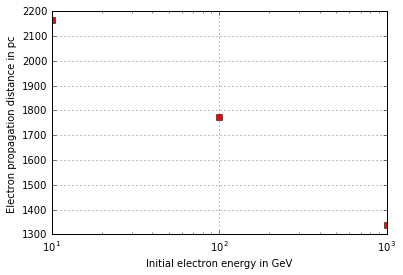

In [92]:
pyplot.figure()
#prop_dists = [prop_dists[E,0] for E in len(E_e)]
print prop_dists
pyplot.semilogx(E_e, prop_dists, marker = "s", ls = "", color = "red")
pyplot.ylabel("Electron propagation distance in pc")
pyplot.xlabel("Initial electron energy in GeV")
#pyplot.ylim(0, 1800)
pyplot.grid()
pyplot.show()

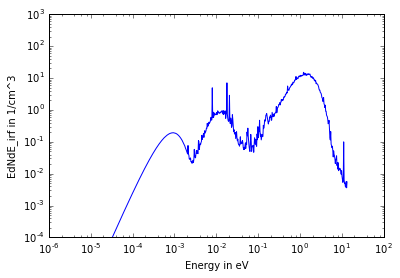

In [93]:
pyplot.loglog(E_irf, E_irf * EdNdE_irf)
pyplot.ylim((1.e-4, 1.e3))
pyplot.xlabel("Energy in eV")
pyplot.ylabel("EdNdE_irf in 1/cm^3")
pyplot.show()

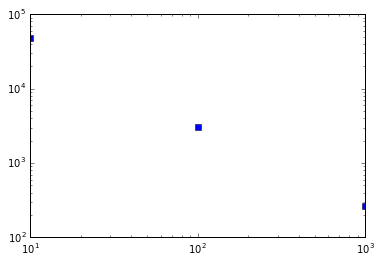

In [94]:
pyplot.loglog(E_e, [D(E)/b(E) for E in E_e], marker = 's', ls = '')
pyplot.show()

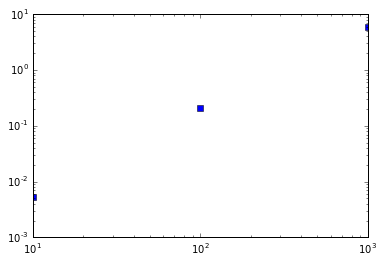

In [96]:
pyplot.loglog(E_e, [b(E) for E in E_e], marker = 's', ls = '')
pyplot.show()